## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#load data set and view first 5 rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#getting the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#getting number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#proportion of users that converted
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#count where landing_page is new_page and group is not treatment
a1 = df.query('landing_page == "new_page" & group != "treatment"').count()['user_id']

#count where landing_page is not new_page and group is treatment
a2 = df.query('landing_page != "new_page" & group == "treatment"').count()['user_id']

a1 + a2

3893

f. Do any of the rows have missing values?

In [7]:
#inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#getting the rows where landing page is new page and group is treatment
df2 = df.query('landing_page == "new_page" & group == "treatment"')
#appending df2 with rows where landing page is old page and group is control
df2 = df2.append(df.query('landing_page == "old_page" & group == "control"'))

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#number of unique users in the bew datafram (df2)
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#getting the repeated user_id
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#getting full details of the repeated id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#get the index for the dupliate rows
idx = df2.index[df2['user_id'] == 773192]
idx

Int64Index([1899, 2893], dtype='int64')

In [14]:
#dropping one of the rows
df2.drop(idx[0], inplace = True)

In [15]:
#confirm that only one was dropped
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#probability of converting regardless of page or group
prob_conv = df2['converted'].mean()
prob_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#probability of users in control group converting
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#probability of users in treatment group converting
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#probability of the receiving new_page
df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**
>I do not think there is sufficient statistical evidence to say the new treatment page led to more conversions.**

>Given that the probability of an individual receiving the new_page is 0.5, it is clear evidence that the selection was fair. This in turn implies that approximately, equal number of individuals got the new_page and old_page.

>Since the selection was fair, if the new treatment page led to more conversions, then it is expected that the probability of users in the treatment group converting should be significantly higher than those in the control group. This was however, not the case.

>The probability of conversion for the control group is 0.001 more than that of the treatment group, which implies that the new treatment page did not lead to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} \leq 0 $$
$$H_1: P_{new} - P_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#getting p_new under the null (both have "true" success rates equal to the converted success rate regardless of page)
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#getting p_old under the null (both have "true" success rates equal to the converted success rate regardless of page)
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
#number of users in treatment group
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$?

In [23]:
#number of users in control group
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
#simulations for new page conversions
new_page_converted = np.random.choice([1,0], size = n_new, p = (p_new, 1-p_new))
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
#simulations for old page conversions
old_page_converted = np.random.choice([1,0], size = n_old, p = (p_old, 1-p_old))
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_new1 = (new_page_converted).mean()
p_old1 = (old_page_converted).mean()
diff =  p_new1 - p_old1 
diff

0.00045227012366723385

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
#10,000 simulations using binomial distribution
p_diffs = [] 

new_page_converted1 = np.random.binomial(n_new, p_new, 10000)/n_new 
old_page_converted1 = np.random.binomial(n_old, p_old, 10000)/n_old

p_diffs.append(new_page_converted1 - old_page_converted1) 

p_diffs

[array([ 0.00100975,  0.00160818,  0.00164954, ...,  0.00066569,
         0.00027312, -0.00047712])]

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

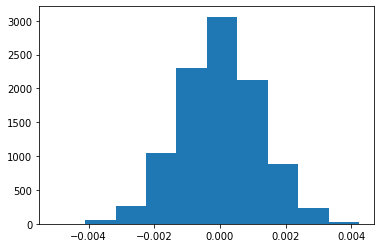

In [28]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
p_diffs = np.array(p_diffs)
actual_diff = actual_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()
p_val = (p_diffs > actual_diff).mean()
p_val

0.9011

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
>The value computed in (part j) above is the probability of obtaining the statistic we observed in our data or one more extreme in favor of the alternative hypothesis if the null hypothesis is true.

>This is called the P_value.

>The P_value is compared to alpha (the threshold for the type I error we are willing comit) for us to make our conclusion/decision. A type I error is committed when we choose the alternative, but the null is true.

>When p_value is less than or equals to alpha, we reject the null hypothesis
When p_value is greater than alpha, we fail to reject the null hypothesis.

>For this project, our Type I error rate (alpha) is 5%, equivalent to 0.05 and our P_value is 0.9, which is greater than alpha, so we fail to reject the null hypothesis (P_new less than or equals to P_old).

>This means that the Conversion rate for the new page is lesser than or equals to the conversion rate for the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
#count of users that converted in control group
convert_old = df2.query('group == "control" & converted == 1').count()[0]
#count of users that converted in treatment group
convert_new = df2.query('group == "treatment" & converted == 1').count()[0]
#number of users in the control group
n_old = df2.query('group == "control"').shape[0]
#number of users in the treatment group
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
#using stats.proportions_ztest to get the test statistic and p-value
stat, pval = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**
>The z-score (-1.31) is the statistics from the observation while the p_value (0.905) is the probability of observing one or more extreme value in favor of the alternative, if the null is true.

>Here, the statistic observed is less than 0, which agrees with the differnece observed from the test data. Also, the p_value is greater than alpha, which also implies that we fail to reject the null hypothesis as we did in (j and k) above.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#creatting intercept and dummy variables
df2['intercept'] = 1
pd.get_dummies(df2['group'])
df2 = df2.join(pd.get_dummies(df2['group']))

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
#fitting the model
import statsmodels.api as sm
log_mod = sm.Logit(df2['converted'], df2[['intercept','treatment']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
#summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:01:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [35]:
#Interpretation of the coefficient for ab_page (treatment)
coeff_for_ab_page = 1/np.exp(-0.0150)
coeff_for_ab_page

1.015113064615719

**Answer** 
>This implies that: If a user is given the control page, he is 1.02 times more likely to convert than a user that was given the treatment page, holding all other variables constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**
>The p-value asscociated with ab_page is (0.190). This is different because for the regression model, what we are looking for the multiplicative effect of either increasing or decreasing the explanatory variable on the depending variable while in Part II, we are testing for the average difference in conversion rates.

>For the regression model, 
H_0: There will be a decrease or no multiplicable effect on the conversion rate when a user is given the new page, holding all other variables constant.
H_1: There will be an increase multiplicable effect on the conversion rate when a user is given the new page, holding all other variables constant.

>Having a negative coeff for the ab_page(treatment) is an indication that conversion rate on treatment page is less likely than control page, holding all other variables constant.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
>In real life, for a user to convert, it goes beyond whether he gets the new page or the control page. There are other contributing factors, some of which we have control over and some that we do not have control over.

>For instace, if a user gets the new page, however as at the time of getting the page, his network strength was not so great, which may either affect how the page shows or even the ability to click on the page. 

>Another factor can be the timing. Perhaps, users are freer on weekends and will visit the page more often than on weekdays.
It is advisable to get as much contributing factors as possible before drawing conclusions.

>The major disadvantage of adding additional items (mainly explanatory variables) is that we might end up adding variables that are correlated, which gives us a wrong interpretation of our regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
#loading countries data set, and combining with df2 to create a new dataset
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [37]:
### Create the necessary dummy variables
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Your Linear Model And Obtain the Results
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','treatment','CA','UK']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:02:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [39]:
#exponentials of the coefficients
treatment_coeff = 1/np.exp(-0.0149)
CA_coeff = 1/np.exp(-0.0408)
UK_coeff = np.exp(0.0099)
treatment_coeff, CA_coeff, UK_coeff

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)

**The above exponentials imply that :**
>If a user lives in US, he is 1.04 times more likely to convert than a user who lives in CA, holding all other variables constant.

>If a user lives in UK, he is 1.01 times more likely to convert than a user who lives in US, holding all other variables constant.

>If a user is given the control page, he is 1.02 times more likely to convert than a user that was given the treatment page, holding all other variables constant.

In [40]:
#getting interactions between country and page
df_new['US_ab_page'] = df_new['US'] * df_new['treatment']
df_new['CA_ab_page'] = df_new['CA'] * df_new['treatment']
df_new['UK_ab_page'] = df_new['UK'] * df_new['treatment']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US,US_ab_page,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0,1


In [41]:
#Fitting the linear model based on interactions
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept','treatment','CA','UK','CA_ab_page','UK_ab_page']])
results3 = log_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:               3.482e-05
Time:                        23:02:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
treatment     -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [42]:
treatment_coeff = 1/np.exp(-0.0206)
CA_coeff = 1/np.exp(-0.0175)
UK_coeff = 1/np.exp(-0.0057)
CA_ab_page_coeff = 1/np.exp(-0.0469)
UK_ab_page_coeff = np.exp(0.0314)
treatment_coeff, CA_coeff, UK_coeff, CA_ab_page_coeff, UK_ab_page_coeff

(1.020813644503746,
 1.0176540221507617,
 1.0057162759095335,
 1.048017202119183,
 1.0318981806179213)

**The p-value for both CA_ab_page and UK_ab_page are both higher than 0.05, which suggests non signifance for the interactions.**

### Inspecting the data before final conclusion.

In [43]:
#Confirm how long the test ran for:
df_new['timestamp'].max(), df_new['timestamp'].min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

In [44]:
#count of users per country:
df_new.groupby(['country','group']).count()['intercept']

country  group    
CA       control        7198
         treatment      7301
UK       control       36360
         treatment     36106
US       control      101716
         treatment    101903
Name: intercept, dtype: int64

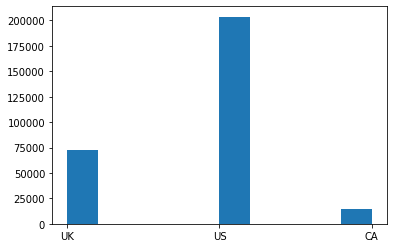

In [45]:
#graph to show distribution of users per country
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df_new['country']);

<a id='conclusions'></a>
## Conclusions

Based on available data and all the tests conducted in Part I, II and III, there is statistical evidence that a user being given the treatment page does not increase the conversion rate and hence, no need deploying the new page. 
Also, the p-value for the Higher Order Terms in the regression model suggests non significance, hence they are not needed in the model.

However, judging by the fact that the samples were collected over a period of 23days, this time is too short to come to the final conclusion if the new page should be launched or not. Also, the distribution of users for each country is not uniformly distrbuted. The following recommendations will be given to the company:

- The duration for the test is too short. The implication of this is that old users were not given ample time to adjust to the new page to avoid the danger of Novelty effect or Change Aversion. The sample collection should go on for about 3 months so as to give old users enough time to convert.
- The distribution of users is not uniformly distributed, with majority of the users being in US. Perhaps, a uniform distribution amongst each country will provide a different result.


### References
[Z-Test](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/)

[Binomial distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html?highlight=binomial#numpy.random.binomial)

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.